In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os.path,shutil
import matplotlib.image as mpimg

### 이미지 데이터 불러오기

In [4]:
!curl -L https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -o ./cats_and_dogs_filtered.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 65.4M  100 65.4M    0     0   130M      0 --:--:-- --:--:-- --:--:--  130M


In [5]:
!unzip -q ./cats_and_dogs_filtered.zip

### 압축한 파일 디렉토리 구조 확인

In [6]:
!apt-get install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (172 kB/s)
Selecting previously unselected package tree.
(Reading database ... 120882 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [7]:
!tree -d .

.
├── cats_and_dogs_filtered
│   ├── train
│   │   ├── cats
│   │   └── dogs
│   └── validation
│       ├── cats
│       └── dogs
├── drive
│   └── MyDrive
│       ├── 2022 ICT Python
│       │   ├── 10week
│       │   ├── 1week
│       │   ├── 2week
│       │   ├── 3week
│       │   ├── 4week
│       │   │   ├── files_new
│       │   │   ├── files_new2
│       │   │   └── files_org
│       │   ├── 5week
│       │   │   ├── traffic_data
│       │   │   │   ├── 01_data_origin
│       │   │   │   │   └── extract
│       │   │   │   │       ├── trfcard(0)
│       │   │   │   │       ├── trfcard(1)
│       │   │   │   │       ├── trfcard(10)
│       │   │   │   │       ├── trfcard(11)
│       │   │   │   │       ├── trfcard(12)
│       │   │   │   │       ├── trfcard(13)
│       │   │   │   │       ├── trfcard(14)
│       │   │   │   │       ├── trfcard(15)
│       │   │   │   │       ├── trfcard(16)
│       │   │   │   │       ├── trfcard(17)
│       │   │   │   │       ├── trfcard(18)
│ 

### 이미지 경로

In [8]:
base_dir = './cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
valid_dir = os.path.join(base_dir,'validation')
train_cat = os.path.join(train_dir,'cats')
train_dog = os.path.join(train_dir,'dogs')
valid_cat = os.path.join(valid_dir,'cats')
valid_dog = os.path.join(valid_dir,'dogs')

In [9]:
train_cat_fnames = os.listdir(train_cat)
train_dog_fnames = os.listdir(train_dog)
valid_cat_fnames = os.listdir(valid_cat)
valid_dog_fnames = os.listdir(valid_dog)

In [10]:
train_dog_fnames[:3]

['dog.592.jpg', 'dog.427.jpg', 'dog.972.jpg']

In [11]:
len(train_cat_fnames),len(train_dog_fnames), len(valid_cat_fnames), len(valid_dog_fnames)

(1000, 1000, 500, 500)

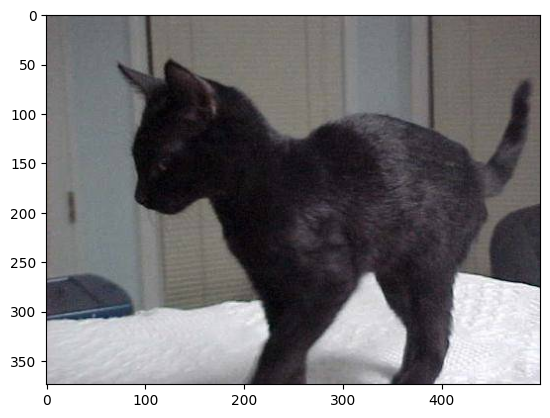

In [12]:
cat_img = os.path.join(train_cat, train_cat_fnames[9])
cat_img = mpimg.imread(cat_img)
plt.imshow(cat_img)

### CNN 패키지 및 VGG전이학습모델 로드

In [17]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator


### 전이학습모델 로드

In [14]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

58889256/58889256 [==============================] - 1s 0us/step


### 전이학습 모델 생성

In [18]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21137729 (80.63 MB)
Trainable params: 6423041 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


### 데이터 전처리 및 변형

In [19]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

### 데이터 변형 준비

In [20]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(valid_dir, target_size=(224, 224), batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### 모델학습

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit_generator(train_generator, epochs=10, validation_data=validation_generator)

<ipython-input-21-7ebfe4d98693>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
63/63 [==============================] - 50s 561ms/step - loss: 1.0598 - accuracy: 0.7120 - val_loss: 0.2782 - val_accuracy: 0.8840
Epoch 2/10
63/63 [==============================] - 34s 534ms/step - loss: 0.2937 - accuracy: 0.8705 - val_loss: 0.2241 - val_accuracy: 0.9070
Epoch 3/10
63/63 [==============================] - 33s 525ms/step - loss: 0.2640 - accuracy: 0.8970 - val_loss: 0.2398 - val_accuracy: 0.8910
Epoch 4/10
63/63 [==============================] - 33s 528ms/step - loss: 0.2512 - accuracy: 0.9035 - val_loss: 0.2002 - val_accuracy: 0.9180
Epoch 5/10
63/63 [==============================] - 33s 528ms/step - loss: 0.1894 - accuracy: 0.9325 - val_loss: 0.1915 - val_accuracy: 0.9260
Epoch 6/10
63/63 [==============================] - 33s 533ms/step - loss: 0.1900 - accuracy: 0.9270 - val_loss: 0.1935 - val_accuracy: 0.9240
Epoch 7/10
63/63 [==============================] - 33s 531ms/step - loss: 0.1928 - accuracy: 0.9240 - val_loss: 0.1801 - val_accuracy: 0.9280

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [23]:
ll = range(len(acc))

Text(0.5, 1.0, 'Train and Valid Accuracy')

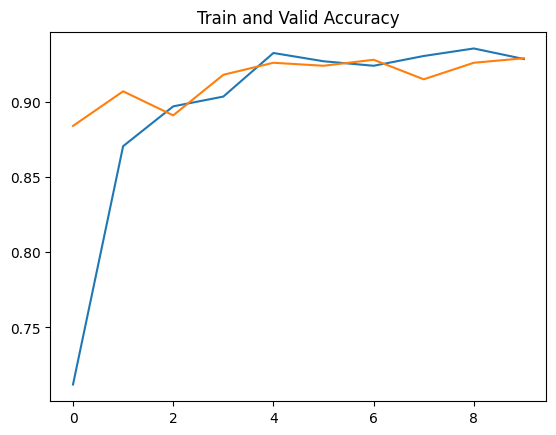

In [24]:
plt.plot(ll, acc)
plt.plot(ll, val_acc)
plt.title('Train and Valid Accuracy')

Text(0.5, 1.0, 'Train and Valid Loss')

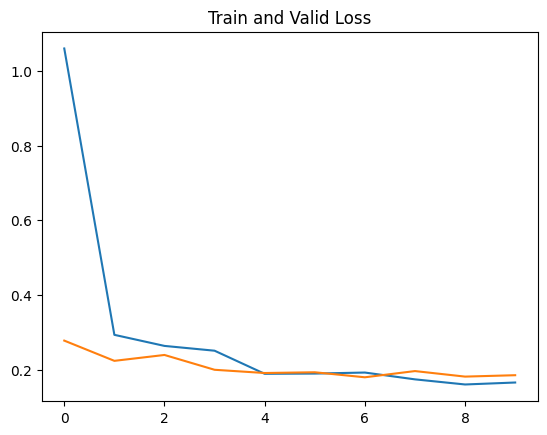

In [25]:
plt.plot(ll, loss)
plt.plot(ll, val_loss)
plt.title('Train and Valid Loss')